# Stock Market Prediction And Forecasting Using Stacked LSTM

### Data Collection

In [1]:
#importing pandas_datareader which connects with Tiingo API
import pandas_datareader as pdr
key="248dc1b303f20e0647994a9023f578116797362a"   ###Security key

In [2]:
#extracting data into dataframe
df = pdr.get_data_tiingo('GOLD', api_key=key)

In [3]:
#saving into csv file
df.to_csv('gold.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('gold.csv')

### Data visualization

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOLD,2016-06-22 00:00:00+00:00,19.65,19.695,19.00,19.22,14405331,18.452791,18.495049,17.842393,18.048989,14405331,0.0,1.0
1,GOLD,2016-06-23 00:00:00+00:00,19.35,19.770,19.26,19.44,10299699,18.171069,18.565480,18.086552,18.255585,10299699,0.0,1.0
2,GOLD,2016-06-24 00:00:00+00:00,20.47,21.080,19.97,21.00,29070144,19.222831,19.795666,18.753294,19.720540,29070144,0.0,1.0
3,GOLD,2016-06-27 00:00:00+00:00,21.11,21.387,20.19,21.00,30845033,19.823838,20.083961,18.959890,19.720540,30845033,0.0,1.0
4,GOLD,2016-06-28 00:00:00+00:00,20.63,21.030,20.42,20.54,18657119,19.373083,19.748712,19.175877,19.288566,18657119,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOLD,2021-06-14 00:00:00+00:00,23.15,23.2568,22.700,22.88,13119149,23.15,23.2568,22.700,22.88,13119149,0.0,1.0
1253,GOLD,2021-06-15 00:00:00+00:00,22.79,23.1600,22.770,23.16,11167047,22.79,23.1600,22.770,23.16,11167047,0.0,1.0
1254,GOLD,2021-06-16 00:00:00+00:00,22.45,23.1400,22.440,22.83,21209542,22.45,23.1400,22.440,22.83,21209542,0.0,1.0
1255,GOLD,2021-06-17 00:00:00+00:00,21.03,21.8800,21.000,21.79,37068425,21.03,21.8800,21.000,21.79,37068425,0.0,1.0
1256,GOLD,2021-06-18 00:00:00+00:00,20.75,21.2256,20.735,21.12,30229386,20.75,21.2256,20.735,21.12,30229386,0.0,1.0


### Data cleaning

In [57]:
df1 = df["close"]

In [60]:
df1

0       19.65
1       19.35
2       20.47
3       21.11
4       20.63
        ...  
1252    23.15
1253    22.79
1254    22.45
1255    21.03
1256    20.75
Name: close, Length: 1257, dtype: float64

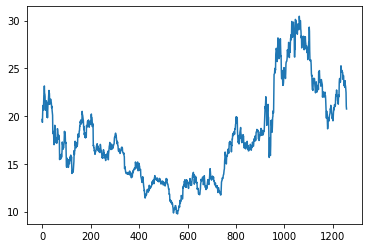

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Data Scaling

##### Note: LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(1257, 1)

#### Train test split

In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
train_data

array([[4.77777778e-01],
       [4.63285024e-01],
       [5.17391304e-01],
       [5.48309179e-01],
       [5.25120773e-01],
       [5.31884058e-01],
       [5.59903382e-01],
       [6.01449275e-01],
       [6.10628019e-01],
       [6.47342995e-01],
       [6.08212560e-01],
       [6.06763285e-01],
       [5.93236715e-01],
       [5.24637681e-01],
       [5.46859903e-01],
       [5.65700483e-01],
       [5.62318841e-01],
       [5.72463768e-01],
       [5.70531401e-01],
       [4.90338164e-01],
       [5.14492754e-01],
       [5.21256039e-01],
       [4.86473430e-01],
       [5.16425121e-01],
       [5.59903382e-01],
       [5.56038647e-01],
       [5.84541063e-01],
       [6.02415459e-01],
       [6.24637681e-01],
       [6.11594203e-01],
       [6.09178744e-01],
       [5.54589372e-01],
       [5.63285024e-01],
       [5.66666667e-01],
       [5.80193237e-01],
       [5.78743961e-01],
       [5.79227053e-01],
       [5.67632850e-01],
       [5.58454106e-01],
       [5.36714976e-01],


In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_data set(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Model Building

In [1]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

ImportError: Traceback (most recent call last):
  File "C:\Users\lucky upadhyay\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64)

Epoch 1/150
12/12 [==============================] - 2s 145ms/step - loss: 0.0016 - val_loss: 0.0057
Epoch 2/150
12/12 [==============================] - 2s 165ms/step - loss: 0.0016 - val_loss: 0.0051
Epoch 3/150
12/12 [==============================] - 2s 179ms/step - loss: 0.0014 - val_loss: 0.0061
Epoch 4/150
12/12 [==============================] - 2s 131ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 5/150
12/12 [==============================] - 2s 130ms/step - loss: 0.0013 - val_loss: 0.0052
Epoch 6/150
12/12 [==============================] - 2s 154ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 7/150
12/12 [==============================] - 2s 153ms/step - loss: 0.0013 - val_loss: 0.0099
Epoch 8/150
12/12 [==============================] - 2s 127ms/step - loss: 0.0015 - val_loss: 0.0116
Epoch 9/150
12/12 [==============================] - 1s 119ms/step - loss: 0.0012 - val_loss: 0.0067
Epoch 10/150
12/12 [==============================] - 1s 120ms/step - loss: 0.0011 - val_lo

Epoch 79/150
12/12 [==============================] - 2s 146ms/step - loss: 3.3381e-04 - val_loss: 0.0018
Epoch 80/150
12/12 [==============================] - 2s 157ms/step - loss: 3.1394e-04 - val_loss: 0.0014
Epoch 81/150
12/12 [==============================] - 2s 156ms/step - loss: 3.4978e-04 - val_loss: 0.0013
Epoch 82/150
12/12 [==============================] - 2s 154ms/step - loss: 3.7786e-04 - val_loss: 0.0029
Epoch 83/150
12/12 [==============================] - 2s 155ms/step - loss: 3.5871e-04 - val_loss: 0.0013
Epoch 84/150
12/12 [==============================] - 2s 182ms/step - loss: 3.0440e-04 - val_loss: 0.0015
Epoch 85/150
12/12 [==============================] - 2s 157ms/step - loss: 3.0948e-04 - val_loss: 0.0014
Epoch 86/150
12/12 [==============================] - 2s 138ms/step - loss: 3.7294e-04 - val_loss: 0.0023
Epoch 87/150
12/12 [==============================] - 2s 145ms/step - loss: 3.6203e-04 - val_loss: 0.0048
Epoch 88/150
12/12 [==========================

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Model evaluation

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

14.401836539416134

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

22.634085689884817

#### Predictions of stocks with actual stock data

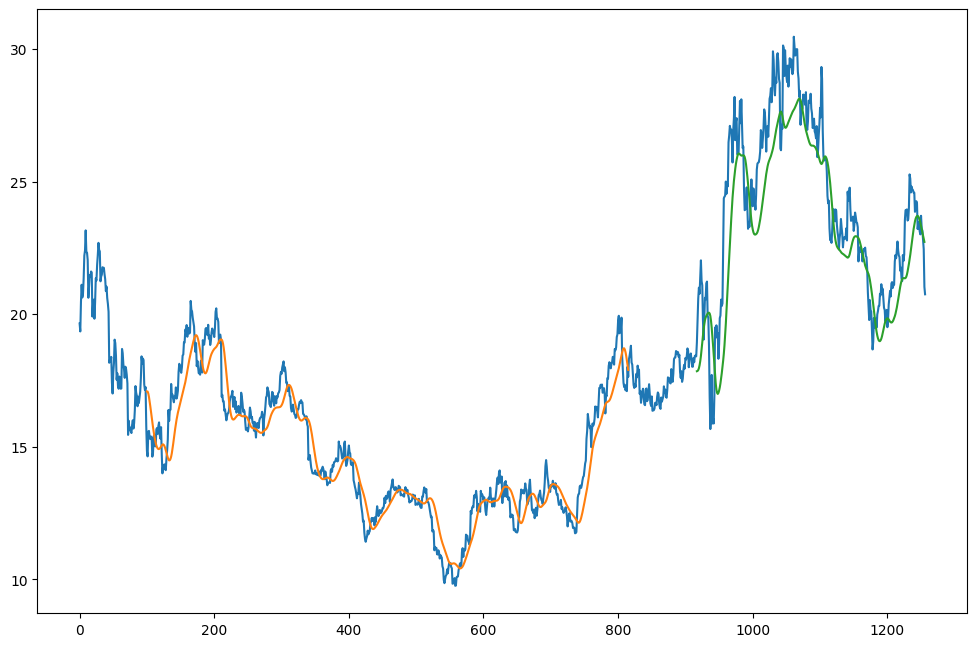

In [53]:
### Plotting 
# shift train predictions for plotting
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=100)
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

440

In [39]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.5908212560386472,
 0.6086956521739129,
 0.6091787439613525,
 0.6173913043478259,
 0.6077294685990338,
 0.6077294685990338,
 0.5908212560386472,
 0.6072463768115941,
 0.6135265700483092,
 0.6120772946859903,
 0.6159420289855073,
 0.6004830917874395,
 0.5985507246376811,
 0.5768115942028984,
 0.534782608695652,
 0.5101449275362319,
 0.48405797101449277,
 0.5202898550724637,
 0.502415458937198,
 0.49951690821256034,
 0.46811594202898543,
 0.4304347826086957,
 0.44492753623188397,
 0.4879227053140096,
 0.4705314009661835,
 0.47246376811594193,
 0.4869565217391304,
 0.4705314009661835,
 0.4942028985507245,
 0.5004830917874395,
 0.5096618357487921,
 0.5101449275362319,
 0.5318840579710145,
 0.5289855072463767,
 0.5492753623188404,
 0.536231884057971,
 0.5410628019323671,
 0.5246376811594202,
 0.5062801932367148,
 0.502415458937198,
 0.4816425120772947,
 0.4946859903381642,
 0.502415458937198,
 0.47101449275362317,
 0.485024154589372,
 0.5125603864734299,
 0.5251207729468598,
 0.5371980676

### Prediction of stocks for upcoming 100 days

In [42]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.61102057]
101
1 day input [0.60869565 0.60917874 0.6173913  0.60772947 0.60772947 0.59082126
 0.60724638 0.61352657 0.61207729 0.61594203 0.60048309 0.59855072
 0.57681159 0.53478261 0.51014493 0.48405797 0.52028986 0.50241546
 0.49951691 0.46811594 0.43043478 0.44492754 0.48792271 0.4705314
 0.47246377 0.48695652 0.4705314  0.4942029  0.50048309 0.50966184
 0.51014493 0.53188406 0.52898551 0.54927536 0.53623188 0.5410628
 0.52463768 0.50628019 0.50241546 0.48164251 0.49468599 0.50241546
 0.47101449 0.48502415 0.51256039 0.52512077 0.53719807 0.52705314
 0.55072464 0.5531401  0.54251208 0.54782609 0.54830918 0.59033816
 0.60241546 0.59661836 0.61062802 0.62705314 0.61111111 0.60144928
 0.59903382 0.57391304 0.57971014 0.55990338 0.55507246 0.60241546
 0.59178744 0.60338164 0.66618357 0.68405797 0.68454106 0.68550725
 0.66521739 0.66763285 0.68888889 0.74927536 0.74154589 0.71642512
 0.72705314 0.72173913 0.72077295 0.71594203 0.71594203 0.68115942
 0.69178744 0.70048309 0.69613527 0

13 day output [[0.5311782]]
14 day input [0.53478261 0.51014493 0.48405797 0.52028986 0.50241546 0.49951691
 0.46811594 0.43043478 0.44492754 0.48792271 0.4705314  0.47246377
 0.48695652 0.4705314  0.4942029  0.50048309 0.50966184 0.51014493
 0.53188406 0.52898551 0.54927536 0.53623188 0.5410628  0.52463768
 0.50628019 0.50241546 0.48164251 0.49468599 0.50241546 0.47101449
 0.48502415 0.51256039 0.52512077 0.53719807 0.52705314 0.55072464
 0.5531401  0.54251208 0.54782609 0.54830918 0.59033816 0.60241546
 0.59661836 0.61062802 0.62705314 0.61111111 0.60144928 0.59903382
 0.57391304 0.57971014 0.55990338 0.55507246 0.60241546 0.59178744
 0.60338164 0.66618357 0.68405797 0.68454106 0.68550725 0.66521739
 0.66763285 0.68888889 0.74927536 0.74154589 0.71642512 0.72705314
 0.72173913 0.72077295 0.71594203 0.71594203 0.68115942 0.69178744
 0.70048309 0.69613527 0.64975845 0.66183575 0.65942029 0.64541063
 0.64009662 0.67391304 0.65072464 0.6468599  0.6294686  0.61304348
 0.54444444 0.5309178

24 day output [[0.48633865]]
25 day input [0.47246377 0.48695652 0.4705314  0.4942029  0.50048309 0.50966184
 0.51014493 0.53188406 0.52898551 0.54927536 0.53623188 0.5410628
 0.52463768 0.50628019 0.50241546 0.48164251 0.49468599 0.50241546
 0.47101449 0.48502415 0.51256039 0.52512077 0.53719807 0.52705314
 0.55072464 0.5531401  0.54251208 0.54782609 0.54830918 0.59033816
 0.60241546 0.59661836 0.61062802 0.62705314 0.61111111 0.60144928
 0.59903382 0.57391304 0.57971014 0.55990338 0.55507246 0.60241546
 0.59178744 0.60338164 0.66618357 0.68405797 0.68454106 0.68550725
 0.66521739 0.66763285 0.68888889 0.74927536 0.74154589 0.71642512
 0.72705314 0.72173913 0.72077295 0.71594203 0.71594203 0.68115942
 0.69178744 0.70048309 0.69613527 0.64975845 0.66183575 0.65942029
 0.64541063 0.64009662 0.67391304 0.65072464 0.6468599  0.6294686
 0.61304348 0.54444444 0.53091787 0.61102057 0.60218811 0.5935303
 0.5853861  0.57790542 0.57110733 0.56493312 0.55928546 0.55405545
 0.54914105 0.54445523 

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [165]:
len(df1)

1257

#### prediction in chart

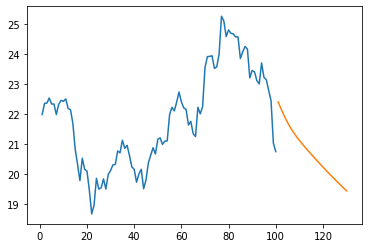

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

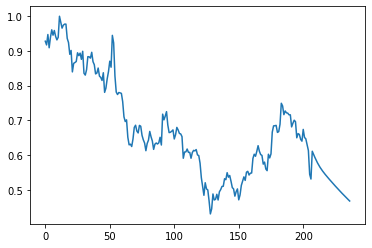

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1050:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

#### Predicted data combined with actual data

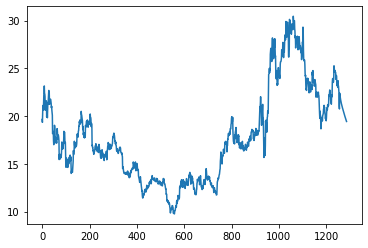

In [48]:
plt.plot(df3)